컨셉: 효과적인 결측치 채우기 + 효과적인 변수 생성 -> 효과적인 데이터의 Embedding 생성

- Name -> Age 의 결측치 채우기
- Name 또한 좋은 변수가 되지 않을까?


- Pclass -> Cabin 과 연관성이 존재
- Fare -> Pclass 와 연관성이 존재
- Fare + Pclass 로 Cabin의 결측치 채우기


- 지금 텍스트 같은 범주형 변수가 매우 많은데 이 변수들을 효과적으로 인코딩 하는 방법이 없을까?
- Embedding or one-hot encoding or label encoding
- Data의 열을 Word2Vec(CBOW, 주변단어가 주어졌으 떼 해당 단어가 발생할 획률을 최대화 함)으로 임베딩 한 뒤에 이름의 임베딩을 활용하면 각 사람들의 차원을 구할 수 있을 것이다 <- 결측치를 채워 나간 이유가 지금과 같은 작업을 하려고 였음 (난 사람들의 임베딩을 구하고 싶어)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/kaggle study/Data/'
model_dir = '/content/drive/MyDrive/kaggle study/Model/'

In [2]:
train_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

## 결측치 확인

In [ ]:
def get_missing_value_img(df, title = 'train data missing value img'):
    missing_value_mat = df.isna().astype(int).values

    xticks_li = [i for i in range(len(missing_value_mat[0]))]
    xticklabels_li = df.columns.tolist()

    fig, ax = plt.subplots(1,1, figsize=(13, 13))

    ax.imshow(missing_value_mat, cmap='gray', interpolation='nearest', aspect='auto')

    ax.set_title('train data missing value img')

    ax.set_xticks(xticks_li)

    ax.set_xticklabels(xticklabels_li)

    plt.show()

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

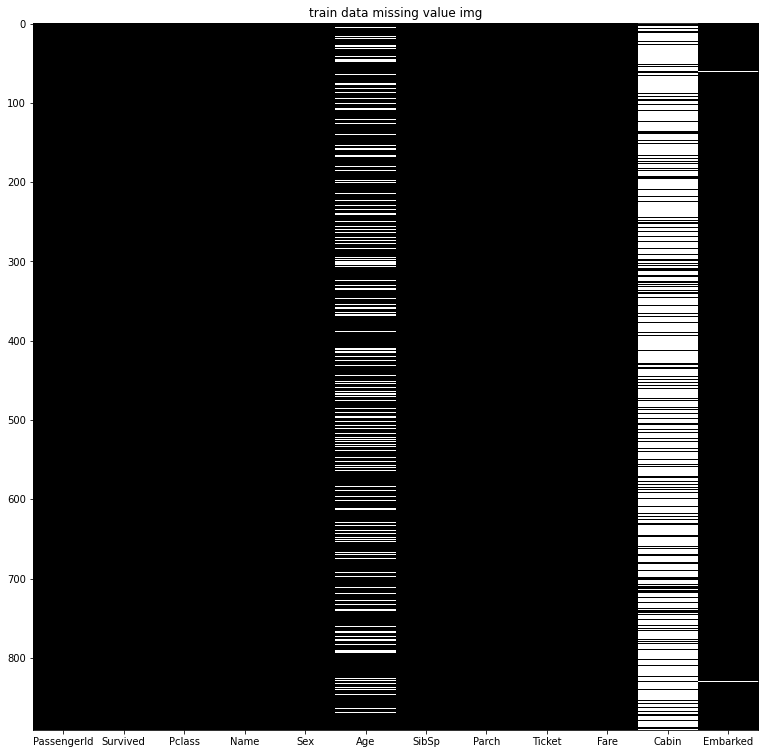

In [ ]:
get_missing_value_img(df = train_df, title = 'train data missing value img')

In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

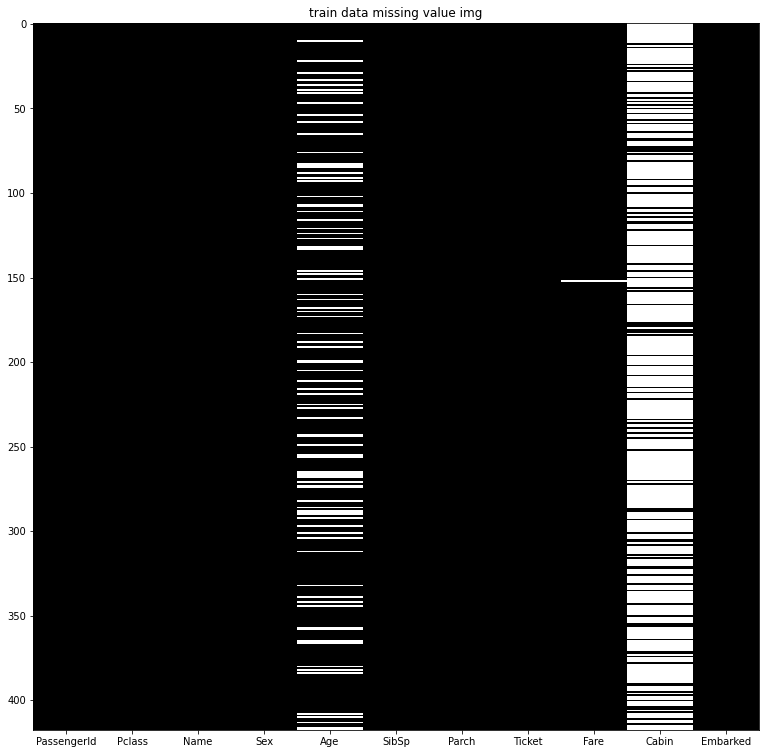

In [ ]:
get_missing_value_img(df = test_df, title = 'test data missing value img')

## Survived + 연속형 변수

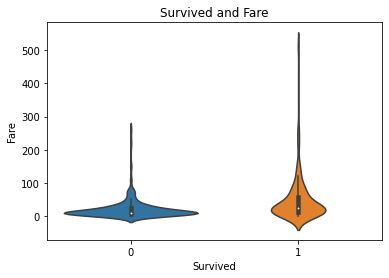

In [ ]:
sns.violinplot(data = train_df, x = 'Survived', y = 'Fare')
plt.title('Survived and Fare')
plt.show()

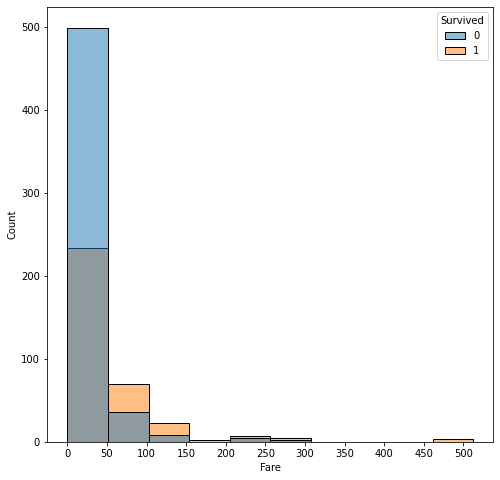

In [ ]:
'''
50 달러씩 나눔
'''

fig, ax = plt.subplots(1,1, figsize=(8, 8))

ax.set_xticks([i for i in range(0, 511, 50)])
ax = sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 10, ax = ax)
plt.show()

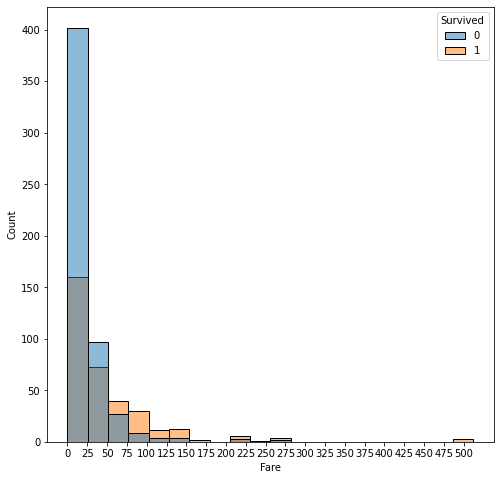

In [15]:
'''
25 달러씩 나눔
'''

fig, ax = plt.subplots(1,1, figsize=(8, 8))

ax.set_xticks([i for i in range(0, 511, 25)])
ax = sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 20, ax = ax)
plt.show()

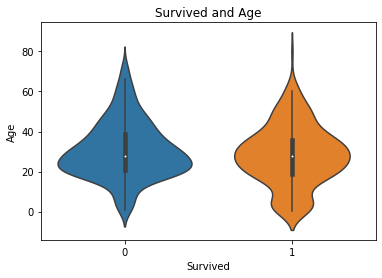

In [ ]:
sns.violinplot(data = train_df, x = 'Survived', y = 'Age')
plt.title('Survived and Age')
plt.show()

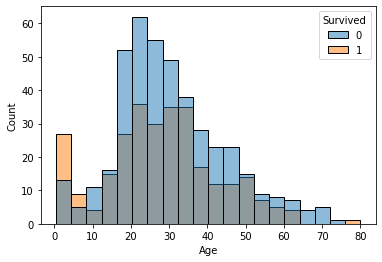

In [ ]:
'''
4살씩
'''
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', bins = 20)

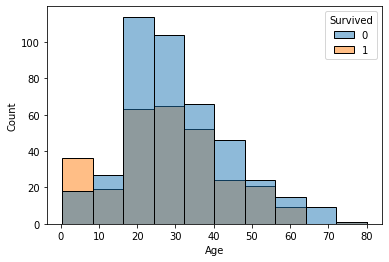

In [ ]:
'''
8살씩
'''
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', bins = 10)

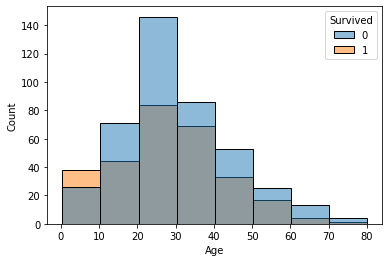

In [ ]:
'''
10살씩
'''
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', bins = 8)

## Survived + 이산형 변수

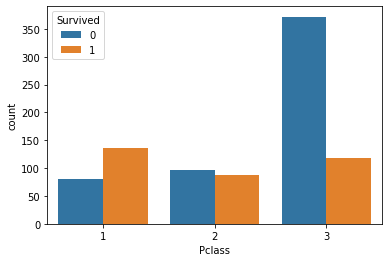

In [ ]:
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived')

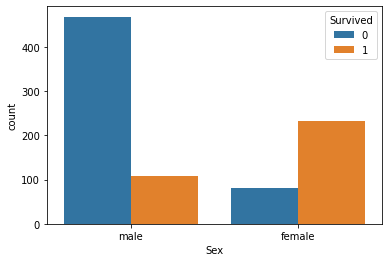

In [ ]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived')

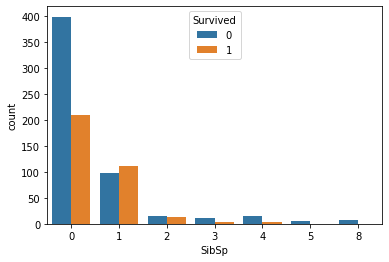

In [ ]:
sns.countplot(data = train_df, x = 'SibSp', hue = 'Survived')

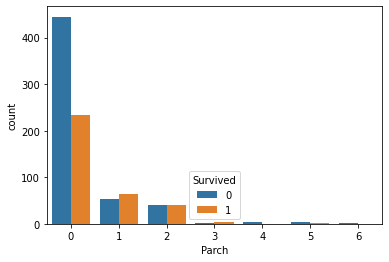

In [ ]:
sns.countplot(data = train_df, x = 'Parch', hue = 'Survived')

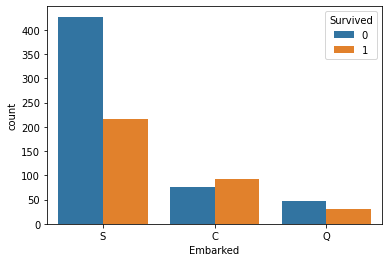

In [ ]:
sns.countplot(data = train_df, x = 'Embarked', hue = 'Survived')

## 이름 정보로 Age 결측치 채우기

In [ ]:
def get_new_Name(x):
    x = x.split(', ')[1]
    x = x.split('.')[0]
    return x

train_df['new_Name'] = train_df['Name'].apply(lambda x : get_new_Name(x))
test_df['new_Name'] = test_df['Name'].apply(lambda x : get_new_Name(x))

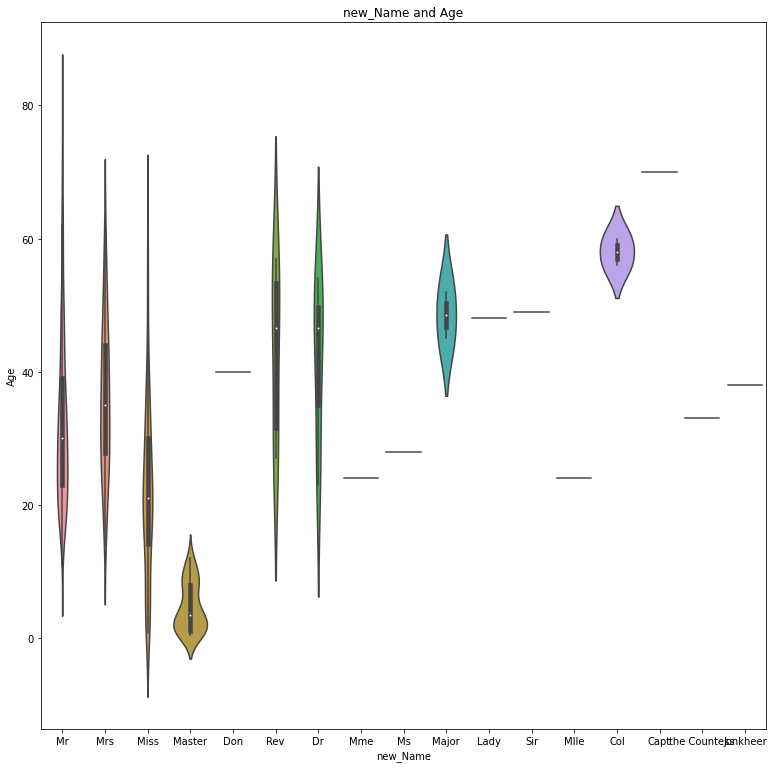

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(13, 13))

sns.violinplot(data = train_df, x = 'new_Name', y = 'Age', ax = ax)
plt.title('new_Name and Age')
plt.show()

In [ ]:
new_Name2Age = {}
for new_Name, Age in zip(train_df.groupby('new_Name').mean()['Age'].index, train_df.groupby('new_Name').mean()['Age'].values):
    new_Name2Age[new_Name] = Age

def get_new_Age(df):
    if pd.isna(df['Age']):
        return new_Name2Age[df['new_Name']]
    else:
        return df['Age']

train_df['new_Age'] = train_df.apply(lambda x : get_new_Age(x), axis = 1)
test_df['new_Age'] = test_df.apply(lambda x : get_new_Age(x), axis = 1)

# Fare + Pclass를 이용한 Cabin 결측치 채우기

In [7]:
def get_new_Cabin(x):
    if pd.isna(x): return x
    else: return str(x)[:1]

train_df['new_Cabin'] = train_df['Cabin'].apply(lambda x : get_new_Cabin(x))

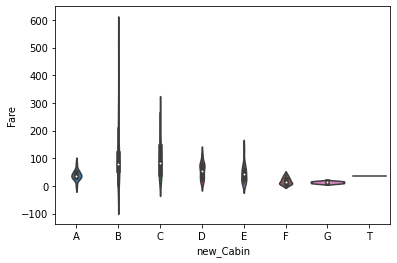

In [13]:
sns.violinplot(data = train_df, y = 'Fare', x = 'new_Cabin', order = sorted([i for i in train_df['new_Cabin'].unique().tolist() if not pd.isna(i)]))

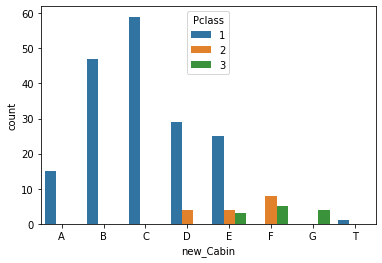

In [14]:
sns.countplot(data = train_df, x = 'new_Cabin', hue = 'Pclass', order = sorted([i for i in train_df['new_Cabin'].unique().tolist() if not pd.isna(i)]))

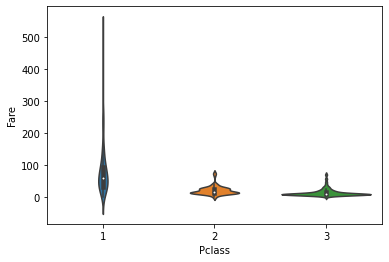

In [ ]:
sns.violinplot(data = train_df, y = 'Fare', x = 'Pclass')

# 연속형 변수의 범주화

Age = 8살씩

Fare = 50 달러씩



In [ ]:
def get_cat_Age(x):
    if x <= 8: return 0
    elif x <= 16: return 1
    elif x <= 24: return 2
    elif x <= 32: return 3
    elif x <= 40: return 4
    elif x <= 48: return 5
    elif x <= 56: return 6
    elif x <= 64: return 7
    elif x <= 72: return 8
    elif x <= 80: return 9
    else: return 10

def get_cat_Fare(x):
    if x <= 50: return 0
    elif x <= 100: return 1
    elif x <= 150: return 2
    elif x <= 200: return 3
    elif x <= 250: return 4
    elif x <= 300: return 5
    elif x <= 350: return 6
    elif x <= 400: return 7
    elif x <= 450: return 8
    elif x <= 500: return 9
    else: return 10


train_df['cat_Pclass'] = 'Pclass' + '_' + train_df['Pclass'].astype(str)
train_df['cat_Sex'] = 'Sex' + '_' + train_df['Sex'].astype(str)
train_df['cat_Age'] = 'Age' + '_' + train_df['new_Age'].apply(lambda x: get_cat_Age(x)).astype(str)
train_df['cat_SibSp'] = 'SibSp' + '_' + train_df['SibSp'].astype(str)
train_df['cat_Parch'] = 'Parch' + '_' + train_df['Parch'].astype(str)
train_df['cat_Fare'] = 'Fare' + '_' + train_df['Fare'].apply(lambda x: get_cat_Fare(x)).astype(str)
values = {'Embarked' : 'S'}
train_df['cat_Embarked'] = 'Embarked' + '_' + train_df.fillna(value = values)['Embarked'].astype(str)
train_df['cat_Name'] = train_df['PassengerId'].astype(str) + '_' + train_df['Name'].astype(str)

test_df['cat_Pclass'] = 'Pclass' + '_' + test_df['Pclass'].astype(str)
test_df['cat_Sex'] = 'Sex' + '_' + test_df['Sex'].astype(str)
test_df['cat_Age'] = 'Age' + '_' + test_df['new_Age'].apply(lambda x: get_cat_Age(x)).astype(str)
test_df['cat_SibSp'] = 'SibSp' + '_' + test_df['SibSp'].astype(str)
test_df['cat_Parch'] = 'Parch' + '_' + test_df['Parch'].astype(str)
values = {'Fare' : 55}
test_df['cat_Fare'] = 'Fare' + '_' + test_df.fillna(value = values)['Fare'].apply(lambda x: get_cat_Fare(x)).astype(str)
test_df['cat_Embarked'] = 'Embarked' + '_' + test_df.fillna(value = values)['Embarked'].astype(str)
test_df['cat_Name'] = test_df['PassengerId'].astype(str) + '_' + test_df['Name'].astype(str)

# Name의 임베딩화

In [ ]:
cols = [col for col in train_df.columns if 'cat' in col]

In [ ]:
sentences = train_df[cols].values.tolist() + test_df[cols].values.tolist()

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.callbacks import CallbackAny2Vec
import datetime

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 1
        self.loss_to_be_subed = 0
        self.loss_now = 987654321

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        print(f'Loss after epoch {self.epoch}: {loss_now}, Total_loss : {loss}')

        self.loss_to_be_subed = loss
        if loss_now < self.loss_now:
            self.loss_now = loss_now
            model.save(model_dir + 'Word2Vec_Embedding_Model.model')
            print('Model 저장')
        self.epoch += 1

start = datetime.datetime.now()

model = Word2Vec(
                sentences = sentences,
                seed = 0,
                iter = 500,
                min_count = 1,
                size = 50,
                sg = 0,
                negative = 1,
                window = 100,
                compute_loss=True, 
                callbacks=[callback()],
                 )

print("Time passed: " + str(datetime.datetime.now() - start))

Loss after epoch 1: 4144.50341796875, Total_loss : 4144.50341796875
Model 저장
Loss after epoch 2: 4113.47998046875, Total_loss : 8257.9833984375
Model 저장
Loss after epoch 3: 4076.240234375, Total_loss : 12334.2236328125
Model 저장
Loss after epoch 4: 4140.0439453125, Total_loss : 16474.267578125
Loss after epoch 5: 4086.970703125, Total_loss : 20561.23828125
Loss after epoch 6: 4175.0859375, Total_loss : 24736.32421875
Loss after epoch 7: 4047.42578125, Total_loss : 28783.75
Model 저장
Loss after epoch 8: 4060.265625, Total_loss : 32844.015625
Loss after epoch 9: 4134.0234375, Total_loss : 36978.0390625
Loss after epoch 10: 4135.74609375, Total_loss : 41113.78515625
Loss after epoch 11: 4177.515625, Total_loss : 45291.30078125
Loss after epoch 12: 4136.47265625, Total_loss : 49427.7734375
Loss after epoch 13: 4032.21484375, Total_loss : 53459.98828125
Model 저장
Loss after epoch 14: 4109.6015625, Total_loss : 57569.58984375
Loss after epoch 15: 4070.78125, Total_loss : 61640.37109375
Loss aft

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec.load(model_dir + 'Word2Vec_Embedding_Model.model')

Name_li = train_df['cat_Name'].tolist() + test_df['cat_Name'].tolist()

arr = []
for Name in Name_li:
    arr.append(model[Name])

arr = np.array(arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 22)
new_arr = tsne.fit_transform(arr)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
rows = len(train_df['cat_Name'].tolist())
train_arr = new_arr[:rows, :]
test_arr = new_arr[rows:, :]

In [ ]:
train_df['X'] = train_arr[:, 0]
train_df['Y'] = train_arr[:, 1]

test_df['X'] = test_arr[:, 0]
test_df['Y'] = test_arr[:, 1]

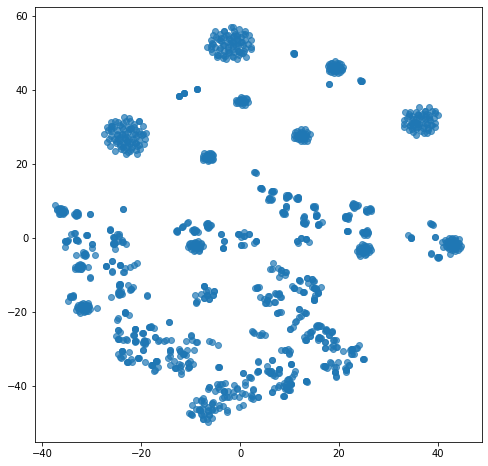

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))

ax.scatter(new_arr[:, 0], new_arr[:, 1], alpha = 0.7)

plt.show()

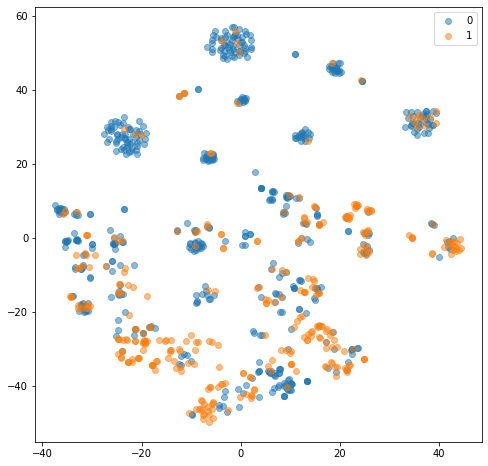

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))

for i in train_df['Survived'].unique():
    df = train_df[train_df['Survived'] == i]

    ax.scatter(df['X'], df['Y'], alpha = 0.5, label = str(i))

plt.legend()
plt.show()

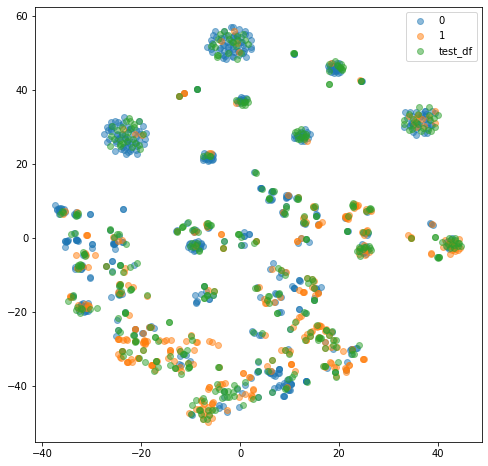

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))

for i in train_df['Survived'].unique():
    df = train_df[train_df['Survived'] == i]

    ax.scatter(df['X'], df['Y'], alpha = 0.5, label = str(i))

ax.scatter(test_df['X'], test_df['Y'], alpha = 0.5, label = 'test_df')

plt.legend()
plt.show()